In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../3.8 Visualization II//world_data_full_apply_nulos.csv', index_col=0)
df.head(5)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [29]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Central America', 'South America',
       'Oceania', 'North America', nan], dtype=object)

Ejercicios intervalo de confianza. Al igual que en el caso del ejercicio de la clase, piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.

Intervalo de Confianza para la Esperanza de Vida Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente. Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

Intervalo de Confianza para el PIB Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

In [6]:
# Drop NaN values from the 'life_expectancy' column before calculations
df_clean = df['life_expectancy'].dropna()

media_duration = df_clean.mean()  # Calculate mean
media_duration

error = stats.sem(df_clean)  # Calculate standard error

nivel_confianza = 0.95
grados_de_libertad = len(df_clean) - 1

valor_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=grados_de_libertad)

limite_inferior = media_duration - valor_critico * error
limite_superior = media_duration + valor_critico * error

print(media_duration)
print(limite_inferior)
print(limite_superior)


72.27967914438503
71.20004561117909
73.35931267759096


In [7]:
df_clean = df['gdp'].dropna()

media_duration = df_clean.mean()  # Calculate mean
media_duration

error = stats.sem(df_clean)  # Calculate standard error

nivel_confianza = 0.9
grados_de_libertad = len(df_clean) - 1

valor_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=grados_de_libertad)

limite_inferior = media_duration - valor_critico * error
limite_superior = media_duration + valor_critico * error

print(media_duration)
print(limite_inferior)
print(limite_superior)

477295901399.5389
218865474606.78442
735726328192.2933



Prueba de Hipótesis




Prueba de Hipótesis sobre Proporciones: ¿Hay una diferencia significativa en la tasa de desempleo entre los países de Europa y América?

Comparación de Medias en Precios de Gasolina : ¿El precio de la gasolina (gasoline_price) es significativamente diferente entre países con un PIB alto y PIB bajo?

In [12]:
#Test de Normalidad :Verifica si la variable "life_expectancy" (esperanza de vida) sigue una distribución normal usando el test de Shapiro-Wilk o Kolmogorov-Smirnov según el tamaño de la muestra.
life_expectancy = df['life_expectancy'].dropna()

len(life_expectancy)

p_valor = stats.shapiro(life_expectancy).pvalue

if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")


Valores no normales


<Axes: xlabel='life_expectancy', ylabel='Count'>

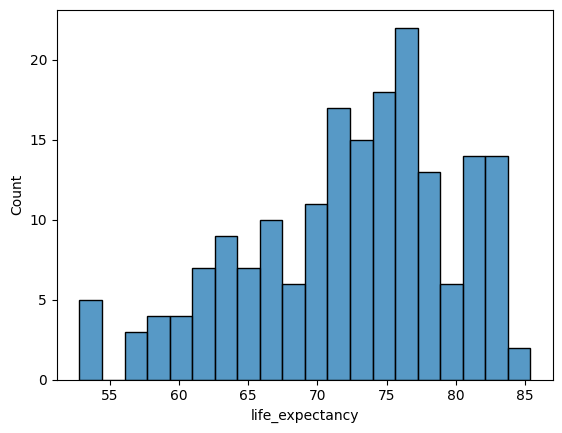

In [14]:
sns.histplot(x='life_expectancy', bins=20, data=df)

Test de Igualdad de Varianzas: Comprueba si la varianza del PIB (GDP) es igual en países de Europa y África usando el test de Bartlett (si los datos son normales) o Levene (si no son normales).

In [15]:
grupo_1 = df[df['continent']== 'Europe']["gdp"]
grupo_2 = df[df['continent']== 'Africa']["gdp"]

In [16]:
if len(grupo_1)> 5000:
    p_valor= stats.kstest(grupo_1, 'norm').pvalue
else:
    p_valor = stats.shapiro(grupo_1).pvalue


if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")

Valores no normales


In [17]:
if len(grupo_2)> 5000:
    p_valor= stats.kstest(grupo_2, 'norm').pvalue
else:
    p_valor = stats.shapiro(grupo_2).pvalue


if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")

Valores no normales


In [18]:
p_valor_varianza = stats.levene(grupo_1, grupo_2).pvalue
p_valor_varianza

if(p_valor_varianza> 0.05):
    print("Varianzas iguales, cumple hipótesis nula")
else:
    print("Varianzas no son iguales, cumple hipótesis nula")

Varianzas no son iguales, cumple hipótesis nula


2C: Comparación de Medias (t-Test de Student o Mann-Whitney U): ¿La esperanza de vida difiere significativamente entre países de América y Asia?

H0: No hay diferencia
H1: Hay diferencia

In [31]:
grupo_1 = df[df['continent'].isin(['North America', 'South America', 'Central America'])]["life_expectancy"].dropna()
grupo_2 = df[df['continent']== 'Asia']["life_expectancy"].dropna()

In [32]:
print(grupo_1.mean())
print(grupo_2.mean())


75.05142857142857
73.7818181818182


In [33]:
if len(grupo_1)> 5000:
    p_valor= stats.kstest(grupo_1, 'norm').pvalue
else:
    p_valor = stats.shapiro(grupo_1).pvalue


if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")

Valores normales


In [34]:
if len(grupo_2)> 5000:
    p_valor= stats.kstest(grupo_2, 'norm').pvalue
else:
    p_valor = stats.shapiro(grupo_2).pvalue


if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")

Valores normales


In [35]:
p_valor_varianza = stats.bartlett(grupo_1, grupo_2).pvalue
p_valor_varianza

if(p_valor_varianza> 0.05):
    print("Varianzas iguales, cumple hipótesis nula")
else:
    print("Varianzas no son iguales, cumple hipótesis nula")

Varianzas iguales, cumple hipótesis nula


In [36]:
t_stat, p_valor=stats.ttest_ind(grupo_1, grupo_2)
if(p_valor > 0.05):
    print("Se cumple mi hipotesis nula")
else: 
    print("No se cumple mi hipotesis nula")

Se cumple mi hipotesis nula


2D: Prueba de Hipótesis sobre Proporciones: ¿Hay una diferencia significativa en la tasa de desempleo entre los países de Europa y América?

H0: No hay diferencia.
H1: Hay diferencia.

In [38]:
grupo_1 = df[df['continent'].isin(['North America', 'South America', 'Central America'])]["unemployment_rate"].dropna()
grupo_2 = df[df['continent']== 'Europe']["unemployment_rate"].dropna()

In [39]:
if len(grupo_1)> 5000:
    p_valor= stats.kstest(grupo_1, 'norm').pvalue
else:
    p_valor = stats.shapiro(grupo_1).pvalue


if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")

Valores no normales


In [40]:
if len(grupo_2)> 5000:
    p_valor= stats.kstest(grupo_2, 'norm').pvalue
else:
    p_valor = stats.shapiro(grupo_2).pvalue


if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")

Valores no normales


In [41]:
p_valor_varianza = stats.levene(grupo_1, grupo_2).pvalue
p_valor_varianza

if(p_valor_varianza> 0.05):
    print("Varianzas iguales, cumple hipótesis nula")
else:
    print("Varianzas no son iguales, cumple hipótesis nula")

Varianzas iguales, cumple hipótesis nula


In [42]:
t_stat, p_valor=stats.mannwhitneyu(grupo_1, grupo_2)
if(p_valor > 0.05):
    print("Se cumple mi hipotesis nula")
else: 
    print("No se cumple mi hipotesis nula")

Se cumple mi hipotesis nula


In [43]:
t_stat, p_valor=stats.ttest_ind(grupo_1, grupo_2)
if(p_valor > 0.05):
    print("Se cumple mi hipotesis nula")
else: 
    print("No se cumple mi hipotesis nula")

Se cumple mi hipotesis nula


2E. Comparación de Medias en Precios de Gasolina : ¿El precio de la gasolina (gasoline_price) es significativamente diferente entre países con un PIB alto y PIB bajo?

H0: No hay diferencia
H1: Hay diferencia

In [49]:
mean_gdp= df['gdp'].mean()

pib_alto = df[df['gdp'] >= mean_gdp]["gasoline_price"].dropna()
pib_bajo = df[df['gdp'] < mean_gdp]["gasoline_price"].dropna()

<Axes: xlabel='gasoline_price', ylabel='Count'>

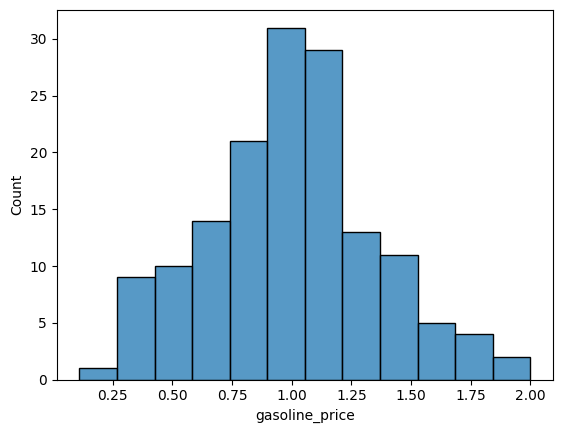

In [54]:
sns.histplot(data=pib_bajo)

<Axes: xlabel='gasoline_price', ylabel='Count'>

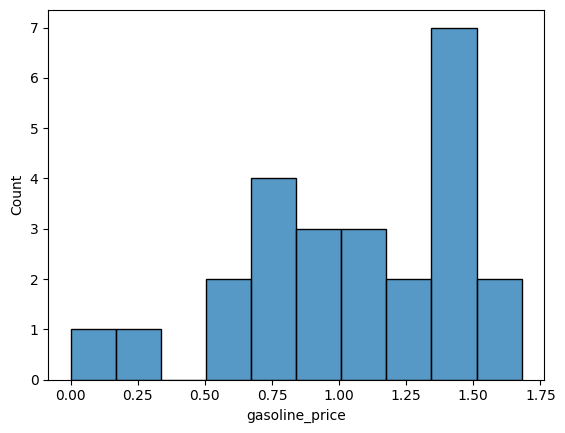

In [58]:
sns.histplot(data=pib_alto, bins=10)

In [50]:
if len(pib_alto)> 5000:
    p_valor= stats.kstest(pib_alto, 'norm').pvalue
else:
    p_valor = stats.shapiro(pib_alto).pvalue


if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")

Valores normales


In [59]:
p_valor

np.float64(0.658228626385462)

In [51]:
if len(pib_bajo)> 5000:
    p_valor= stats.kstest(pib_bajo, 'norm').pvalue
else:
    p_valor = stats.shapiro(pib_bajo).pvalue


if p_valor > 0.05: 
    print("Valores normales")
else:
     print("Valores no normales")

Valores normales


In [62]:
p_valor_varianza = stats.bartlett(pib_alto, pib_bajo).pvalue
p_valor_varianza

if(p_valor_varianza> 0.05):
    print("Varianzas iguales, cumple hipótesis nula")
else:
    print("Varianzas no son iguales, cumple hipótesis nula")

Varianzas iguales, cumple hipótesis nula


In [63]:
t_stat, p_valor=stats.ttest_ind(pib_alto, pib_bajo)
if(p_valor > 0.05):
    print("Se cumple mi hipotesis nula")
else: 
    print("No se cumple mi hipotesis nula")

Se cumple mi hipotesis nula
